In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [29]:
df = pd.read_csv("Dentistry Dataset.csv")

Checking missing values

In [30]:
df.isnull().sum()

,0
Sl No,0
Sample ID,1100
Age,0
Gender,0
inter canine distance intraoral,0
intercanine distance casts,0
right canine width intraoral,0
right canine width casts,0
left canine width intraoral,0
left canine width casts,0


Since in Sample ID have total missing value so I drop that column from dataframe

In [31]:
df = df.drop(["Sample ID","Sl No"],axis=1)

In [32]:
df.isnull().sum()

,0
Age,0
Gender,0
inter canine distance intraoral,0
intercanine distance casts,0
right canine width intraoral,0
right canine width casts,0
left canine width intraoral,0
left canine width casts,0
right canine index intra oral,0
right canine index casts,0


In [33]:
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1100 non-null   int64  
 1   Gender                           1100 non-null   object 
 2   inter canine distance intraoral  1100 non-null   float64
 3   intercanine distance casts       1100 non-null   float64
 4   right canine width intraoral     1100 non-null   float64
 5   right canine width casts         1100 non-null   float64
 6   left canine width intraoral      1100 non-null   float64
 7   left canine width casts          1100 non-null   float64
 8   right canine index intra oral    1100 non-null   float64
 9   right canine index casts         1100 non-null   float64
 10  left canine index intraoral      1100 non-null   float64
 11  left canine index casts          1100 non-null   float64
dtypes: float64(10), int6

In [35]:
df.shape

(1100, 12)

Since our machine learning model will not understand the text part and in our dataset the target value is in True or False now we need to convert those into numerical one and using Label Encoder which will convert into 0 or 1.

In [36]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # 0 for Female, 1 for Male
df


,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,1,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,1,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,1,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,1,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


we the help of heat map we can check the multicollinearity

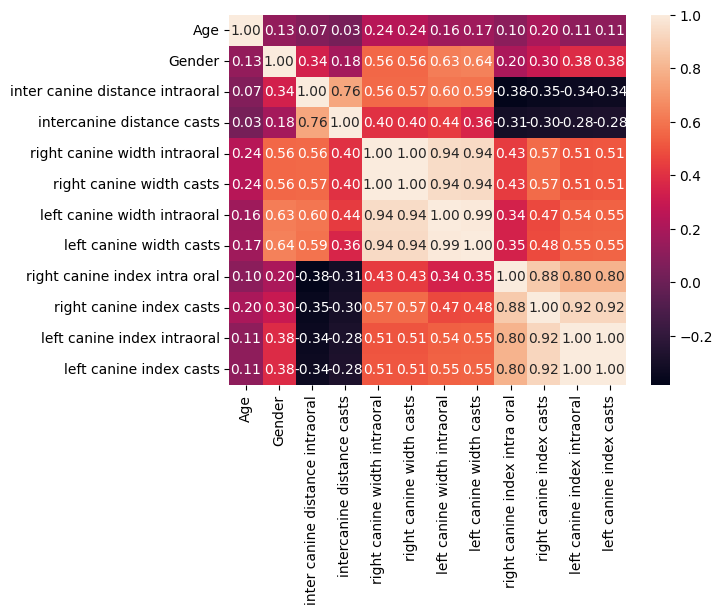

In [37]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()



We Calculate the variance_inflation_factor(vif) value and drop those columns which value higher than 5

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = df.select_dtypes(include=['float64', 'int64'])
vif = pd.DataFrame()
vif['Variable'] = df.columns
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif)


                           Variable           VIF
0                               Age  1.306876e+02
1                            Gender  3.508414e+00
2   inter canine distance intraoral  1.227148e+04
3        intercanine distance casts  1.113765e+04
4      right canine width intraoral  9.637232e+05
5          right canine width casts  1.028867e+06
6       left canine width intraoral  7.255835e+05
7           left canine width casts  6.725488e+05
8     right canine index intra oral  1.254975e+03
9          right canine index casts  7.770541e+04
10      left canine index intraoral  3.703637e+05
11          left canine index casts  3.462860e+05


In [39]:
# Dropping highly correlated features
df = df.drop(columns=['right canine width intraoral', 'left canine width intraoral', 'right canine index casts', 'left canine width casts'])

# View the reduced dataframe
df.head()


,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width casts,right canine index intra oral,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,0.237,0.247,0.247
2,23,0,23.83,23.83,5.96,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,0.231,0.246,0.246


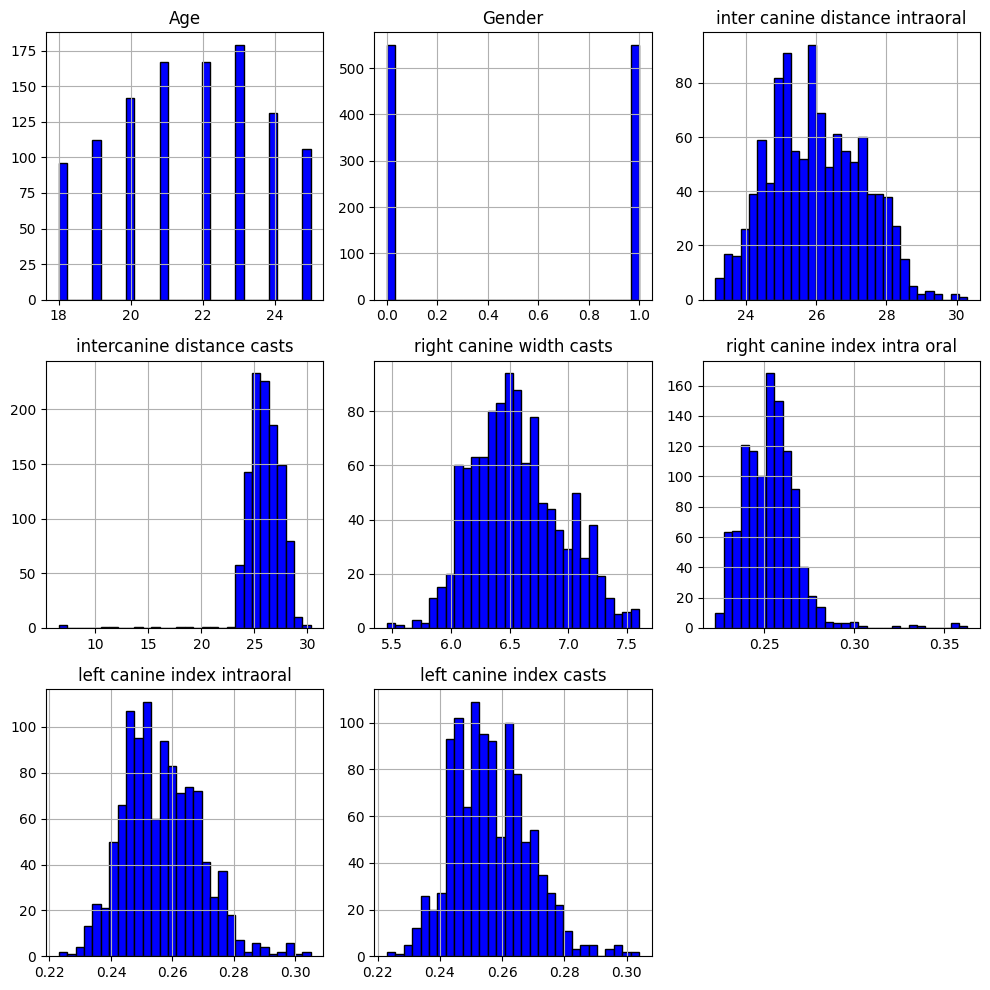

In [40]:
df.hist(bins=30, color='blue', edgecolor='black', figsize=(10, 10))
# Adjust the layout
plt.tight_layout()
# Display the plot
plt.show()

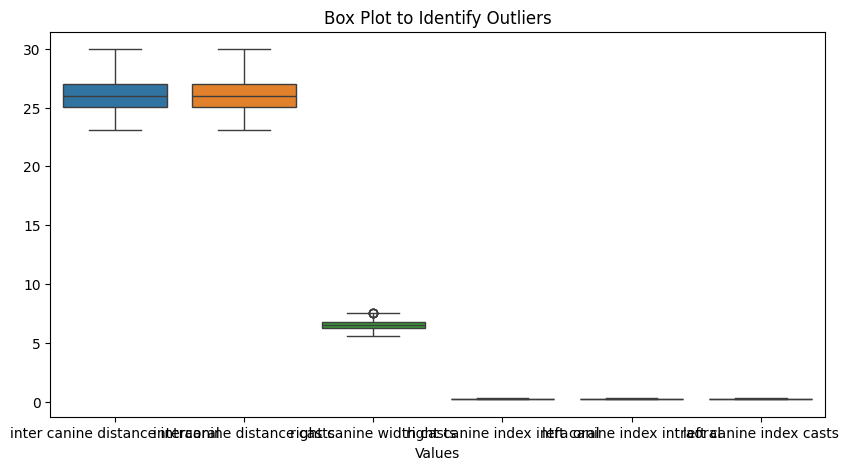

In [52]:
# Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['inter canine distance intraoral', 'intercanine distance casts','right canine width casts','right canine index intra oral','left canine index intraoral','left canine index casts']])
plt.title('Box Plot to Identify Outliers')
plt.xlabel('Values')
plt.show()


In [53]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to all numeric columns in X
for column in df.columns:
    df = remove_outliers(df, column)


In [42]:
X = df.drop('Gender',axis=1)
y = df['Gender']

In [43]:
X

,Age,inter canine distance intraoral,intercanine distance casts,right canine width casts,right canine index intra oral,left canine index intraoral,left canine index casts
0,24,25.06,25.05,6.08,0.242,0.242,0.241
1,22,25.78,25.79,6.13,0.237,0.247,0.247
2,23,23.83,23.83,5.96,0.248,0.264,0.264
3,20,26.12,26.12,6.08,0.232,0.250,0.250
4,20,26.36,26.41,6.09,0.231,0.246,0.246
...,...,...,...,...,...,...,...
1095,24,24.29,24.29,6.58,0.271,0.272,0.272
1096,22,25.22,25.22,6.70,0.265,0.269,0.269
1097,25,24.24,24.24,6.60,0.272,0.272,0.272
1098,21,24.87,24.87,6.57,0.264,0.267,0.267


In [44]:
y

,Gender
0,0
1,0
2,0
3,0
4,0
...,...
1095,1
1096,1
1097,1
1098,1


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

results = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
print(results_df)

best_model = results_df.loc[results_df['F1 Score'].idxmax()]

print("\nBest Model Based on F1 Score:")
best_model


                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.707547   0.710445  0.707547  0.707417
1           Decision Tree  0.867925   0.868150  0.867925  0.867960
2           Random Forest  0.877358   0.881166  0.877358  0.877304
3  Support Vector Machine  0.721698   0.723360  0.721698  0.721741
4             Naive Bayes  0.721698   0.722687  0.721698  0.721791
5     K-Nearest Neighbors  0.797170   0.797124  0.797170  0.797129
6       Gradient Boosting  0.839623   0.843228  0.839623  0.839551
7                AdaBoost  0.783019   0.794910  0.783019  0.781856

Best Model Based on F1 Score:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,2
Model,Random Forest
Accuracy,0.877358
Precision,0.881166
Recall,0.877358
F1 Score,0.877304
